In [2]:
import numba
import sys
sys.path.insert(0, './python_lib')
import networkx as nx
import numpy as np
import graph_gen
import model
import random
from collections import defaultdict
import torch
import math


In [3]:
%matplotlib inline

In [4]:
m = n = l = 3 # L of square grid

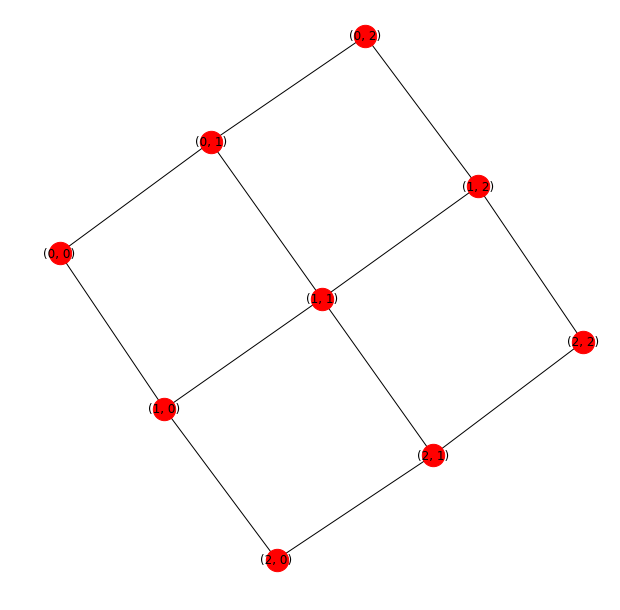

In [5]:
import imp
imp.reload(graph_gen)
N, J_interaction = graph_gen.grid_2d_interaction(n,m)

In [6]:
import graph_gen
import imp
imp.reload(graph_gen)
j = graph_gen.fixed_value(1)
J = graph_gen.set_J(J_interaction, j)
h = 0.
H = np.full((N,), h)
beta = 1

In [7]:
import model
import imp
imp.reload(model)

grid_2d = model.model(N, H, J, J_interaction, beta)

In [12]:
F_exact = grid_2d.exact()

Enumerating...
0 / 512(0.00%), E = -12.0, Z = 1.63e+05, F = -12.0
Energy: -1.27 
M: -7.08e-17 
S: 0.151
Free_energy: -1.423 (-1.423)


In [8]:
import bp_solver
imp.reload(bp_solver)
from bp_solver import BP_solver

In [10]:
BP_tree = BP_solver(grid_2d) 
BP_tree.converge()


... -0.9334101227298078
 iter:1,  err: 5.478 free_energy -1.33... -1.0727328864930479
 iter:2,  err: 5.099 free_energy -1.27... -1.1001394064378722
 iter:3,  err: 3.855 free_energy -1.30... -1.1086340116301374
 iter:4,  err: 3.325 free_energy -1.28... -1.2331740347324454
 iter:5,  err: 2.494 free_energy -1.35... -1.2528501701626165
 iter:6,  err: 0.536 free_energy -1.35... -1.2640071819112983
 iter:7,  err: 0.241 free_energy -1.35... -1.2675231037126369
 iter:8,  err: 0.077 free_energy -1.35... -1.2685231094785587
 iter:9,  err: 0.021 free_energy -1.35... -1.2687092365358805
 iter:10,  err: 0.004 free_energy -1.35... -1.2687592919078983
 iter:11,  err: 0.001 free_energy -1.35... -1.2687714291361119
 iter:12,  err: 0.000 free_energy -1.35... -1.2687742444431964
 iter:13,  err: 0.000 free_energy -1.35... -1.2687749046761896
 iter:14,  err: 0.000 free_energy -1.35... -1.268775064053412
 iter:15,  err: 0.000 free_energy -1.35... -1.2687751018471256
 iter:16,  err: 0.000 free_energy -1.35..